<a href="https://colab.research.google.com/github/sholaypompey/project-sampling/blob/main/Predicting_Bank_Customers_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Exploration##

In [1]:
!unzip "/content/archive.zip" -d "/content/drive/MyDrive/currency"

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/currency/Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
# Check for empty space
df.isnull

<bound method DataFrame.isnull of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [6]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Check the data types
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
# Check for strings or non_numerical features
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Surname
Geography
Gender
Card Type


In [10]:
# Drop irrelevant features
df = df.drop(["RowNumber", "Surname", "CustomerId"], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [11]:
# Convert non_numeric data into category
for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label] = pd.Categorical(content).codes+1

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,1,1,42,2,0.00,1,1,1,101348.88,1,1,2,1,464
1,608,3,1,41,1,83807.86,1,0,1,112542.58,0,1,3,1,456
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1,1,3,1,377
3,699,1,1,39,1,0.00,2,0,0,93826.63,0,0,5,2,350
4,850,3,1,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,2,39,5,0.00,2,1,0,96270.64,0,0,1,1,300
9996,516,1,2,35,10,57369.61,1,1,1,101699.77,0,0,5,3,771
9997,709,1,1,36,7,0.00,1,0,1,42085.58,1,1,3,4,564
9998,772,2,2,42,3,75075.31,2,1,0,92888.52,1,1,2,2,339


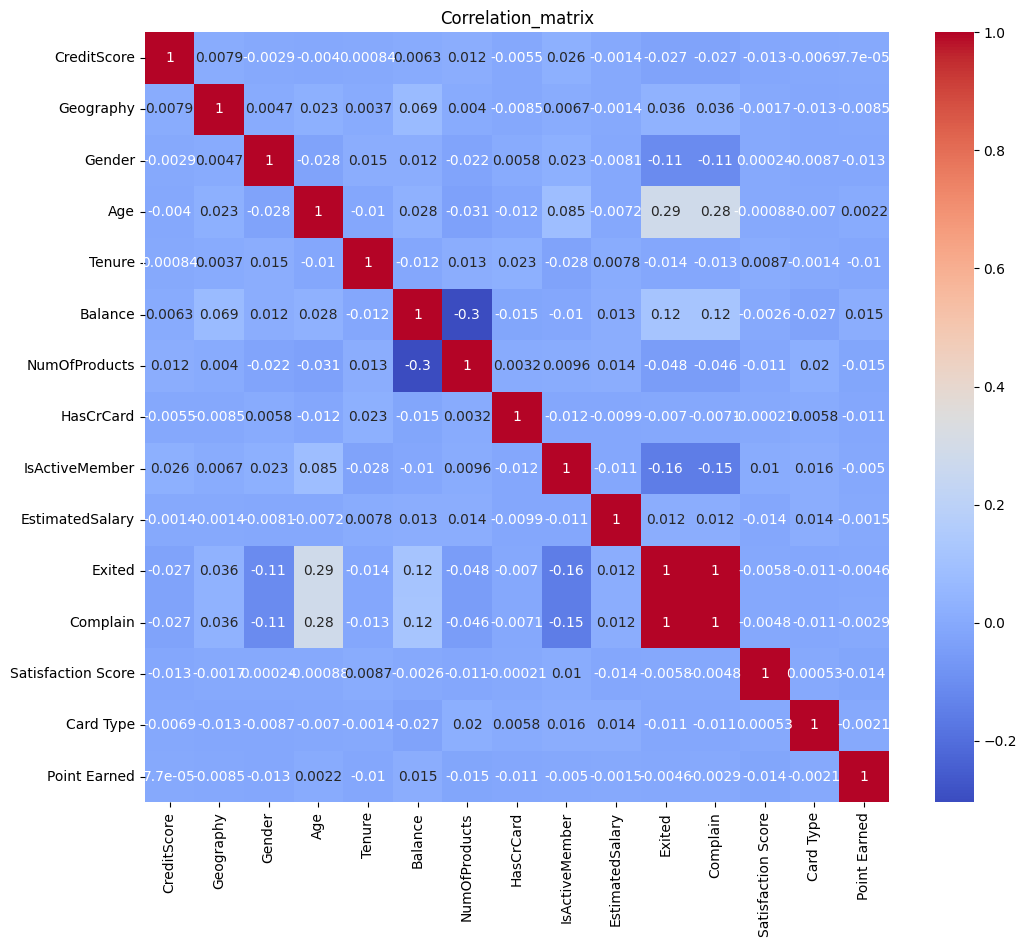

In [13]:
# Visualize our data
correlation_matrix = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", )
plt.title("Correlation_matrix")
plt.show()

In [14]:
# Analyze the churn rate
churn_rate = df.Exited.mean()
churn_rate

0.2038

In [15]:
pd.crosstab(df["Gender"], df["Exited"]) # Where 1 = Female and 2 = Male

Exited,0,1
Gender,,
1,3404,1139
2,4558,899


In [16]:
gender_avg = df.groupby("Gender").mean()
gender_avg

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
Gender,,,,,,,,,,,,,,
1,650.831389,1.742021,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715,0.251376,3.013427,2.508695,609.789566
2,650.276892,1.749863,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164743,0.165292,3.014110,2.489097,603.789078


In [17]:
# Calculate the average balnace for churn and retained customers
avg_bal_churn = df[df["Exited"] == 1]["Balance"].mean()
avg_bal_retained = df[df["Exited"] == 0]["Balance"].mean()
avg_bal_churn, avg_bal_retained

(91109.47600588812, 72742.75066314996)

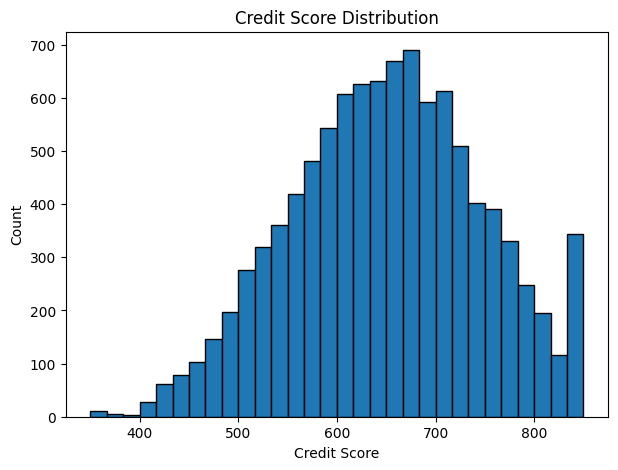

In [18]:
# Analyze the distribution of Credit score
plt.figure(figsize =(7, 5))
plt.hist(df['CreditScore'], bins = 30, edgecolor = "k")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

##Model Implementation##

In [19]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]
X.head(), y.head()

(   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0          619          1       1   42       2       0.00              1   
 1          608          3       1   41       1   83807.86              1   
 2          502          1       1   42       8  159660.80              3   
 3          699          1       1   39       1       0.00              2   
 4          850          3       1   43       2  125510.82              1   
 
    HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
 0          1               1        101348.88         1                   2   
 1          0               1        112542.58         1                   3   
 2          1               0        113931.57         1                   3   
 3          0               0         93826.63         0                   5   
 4          1               1         79084.10         0                   5   
 
    Card Type  Point Earned  
 0          1           

In [20]:
# Split our data 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(y_train), len(X_test), len(y_test)

(8000, 8000, 2000, 2000)

In [21]:
# Instantiate our model
clf = RandomForestClassifier()
# Fit the model
clf.fit(X_train, y_train)
# Evaluate the model
clf.score(X_test, y_test)

0.999

In [22]:
# Predict the model
y_preds = clf.predict(X_test)
y_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [23]:
np.array(y_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
roc = roc_auc_score(y_test, y_preds)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1: {f1}")
print(f"Roc_Auc: {roc}")

Accuracy: 1.00%
Precision: 0.9974554707379135
Recall: 0.9974554707379135
f1: 0.9974554707379135
Roc_Auc: 0.9984165966010663


In [25]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[1606,    1],
       [   1,  392]])

<Axes: >

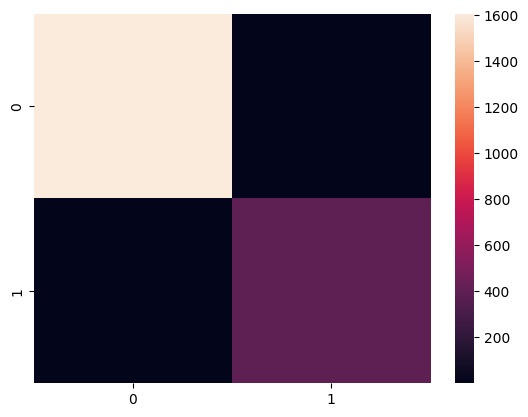

In [26]:
# Plot confusion matrix
sns.heatmap(cm)

#Prediction probabilities

In [27]:
y_probs = clf.predict_proba(X_test)
y_probs[:20]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.12, 0.88],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [28]:
y_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [29]:
y_probs[:, 1][:20]

array([0.  , 0.  , 0.01, 0.02, 0.01, 0.  , 0.  , 0.88, 0.02, 0.01, 0.97,
       1.  , 0.98, 0.02, 0.  , 0.  , 0.03, 0.03, 0.  , 0.01])

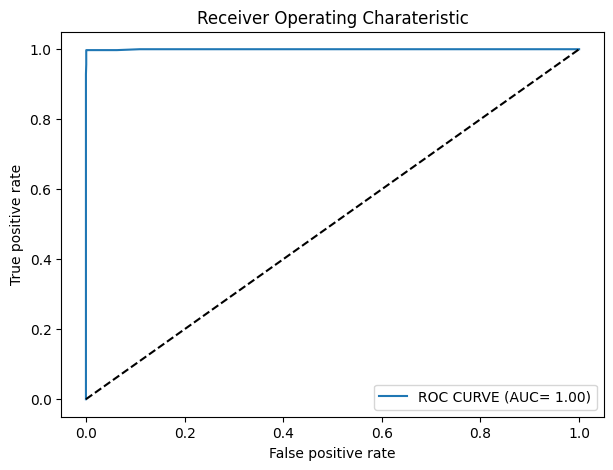

In [30]:
# Probabilities for positive class prediction
y_probs = clf.predict_proba(X_test)[:, 1]
y_probs


# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize= (7,5))
plt.plot(fpr, tpr, label = f"ROC CURVE (AUC= {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("Receiver Operating Charateristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc = "lower right")
plt.show()

In [36]:
feat_imp = clf.feature_importances_
feat_imp

array([0.00992726, 0.00695402, 0.00351804, 0.06497775, 0.00539742,
       0.01581586, 0.04887603, 0.00120626, 0.01337403, 0.00958474,
       0.80461563, 0.00340055, 0.00298076, 0.00937166])

In [39]:
feat_imp_df = pd.DataFrame({"features": X_train.columns, "importance": feat_imp})
feat_imp_df = feat_imp_df.sort_values("importance", ascending = False)
feat_imp_df

,features,importance
10,Complain,0.804616
3,Age,0.064978
6,NumOfProducts,0.048876
5,Balance,0.015816
8,IsActiveMember,0.013374
0,CreditScore,0.009927
9,EstimatedSalary,0.009585
13,Point Earned,0.009372
1,Geography,0.006954
4,Tenure,0.005397


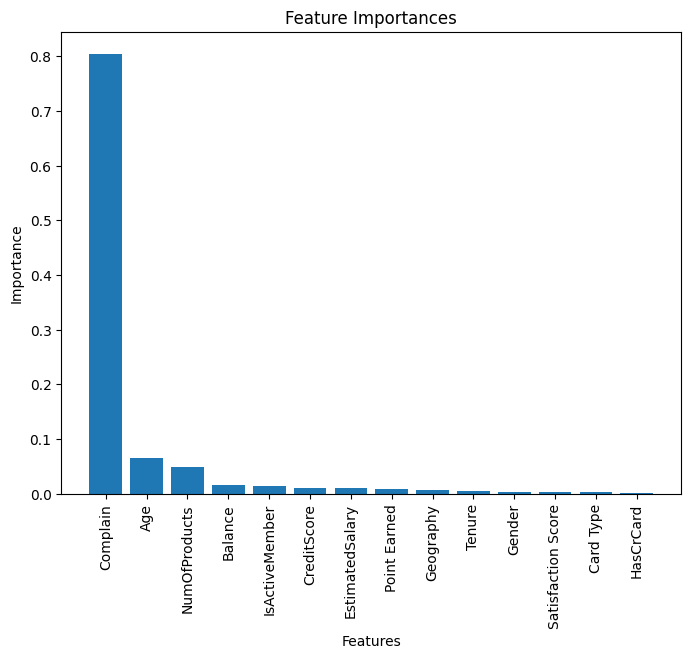

In [40]:
# Plot feature importance
plt.figure(figsize= (8, 6))
plt.bar(feat_imp_df["features"], feat_imp_df['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

## **NB: The plot above shows that customers *complain* have more effect on the number of customers churn**